`Create class for drawing plots` 

`Create function “draw_plots”` 
* reads json file passed as parameter as a pandas dataframe
* draws plot for comparing different columns
* saves plots in a folder called “plots”
* returns paths to all plots

### Imports

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:

class PlotDrawer:
    def __init__(self, output_folder="plots"):
        self.output_folder = output_folder

        # Create output folder if it doesn't exist
        os.makedirs(self.output_folder, exist_ok=True)

    def draw_plots(self, data_df):
        paths = []

        # Iterate over each column except 'name'
        # Save Barplots: gt_corners vs other columns
        for column in data_df.columns:
            if column == 'name':
                continue

            # Create Subplots
            fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))

            fig.suptitle('Compare gt_corners and rb_corners')
            # Plot the data
            sns.barplot(ax=ax1, x='gt_corners', y=column, data=data_df)
            ax1.set_xlabel('Ground Truth Corners')
            ax1.set_ylabel(column)
            ax1.set_title(f'Ground Truth Corners vs {column}')
            
            sns.barplot(ax=ax2, x='rb_corners', y=column, data=data_df)
            ax2.set_xlabel('Number of Corners found by the Model')
            ax2.set_ylabel(column)
            ax2.set_title(f'Number of Corners found by the Model vs {column}')

            # Save the plot
            plot_path = os.path.join(self.output_folder, f'{column}_plot.png')
            plt.savefig(plot_path)
            paths.append(plot_path)
            
            # Close the plot
            plt.close()

        return paths


In [52]:
# Load the JSON data into a pandas dataframe
df = pd.read_json('deviation.json')

# Create an instance of PlotDrawer
plot_drawer = PlotDrawer()

# Call the draw_plots function to generate and save the plots
plot_paths = plot_drawer.draw_plots(df)

# Print the paths to the generated plots
for path in plot_paths:
    print(path)


plots\gt_corners_plot.png
plots\rb_corners_plot.png
plots\mean_plot.png
plots\max_plot.png
plots\min_plot.png
plots\floor_mean_plot.png
plots\floor_max_plot.png
plots\floor_min_plot.png
plots\ceiling_mean_plot.png
plots\ceiling_max_plot.png
plots\ceiling_min_plot.png


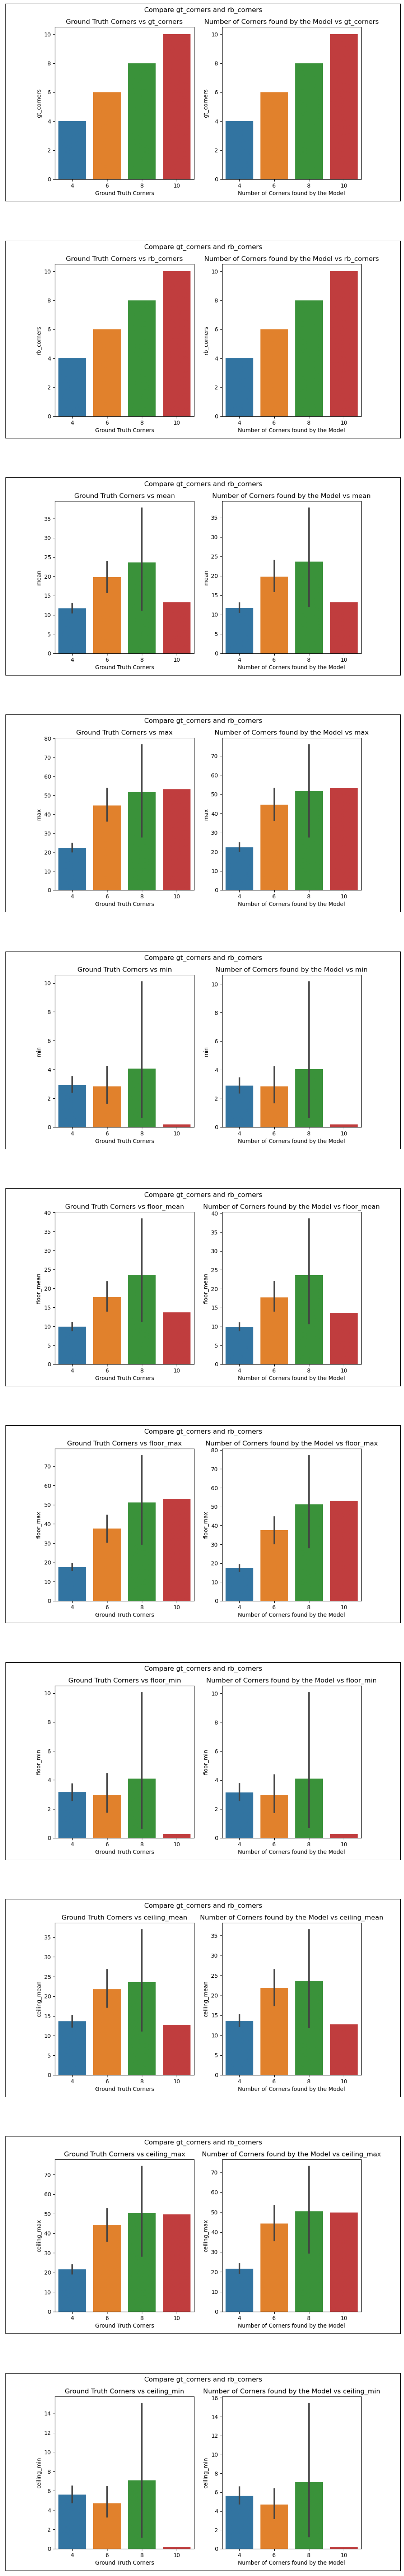

In [60]:
# Show Every Saved Plot In 1 Column

# import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in plot_paths:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(200,100))
columns = 1
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

## Result

***Models Predictions were 100% accurate***